# Traffic

### 1.     import pandas numpy e.t.c

In [89]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import feature_selection as fs
from sklearn import metrics, cross_validation
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

### 2.  Get data

In [90]:
test = pd.read_csv('test.csv')
tid = test['ride_id']
train = pd.read_csv('train.csv')
print(train.shape, test.shape)

(51645, 10) (1111, 7)


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
ride_id            51645 non-null int64
seat_number        51645 non-null object
payment_method     51645 non-null object
payment_receipt    51645 non-null object
travel_date        51645 non-null object
travel_time        51645 non-null object
travel_from        51645 non-null object
travel_to          51645 non-null object
car_type           51645 non-null object
max_capacity       51645 non-null int64
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [92]:
train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [93]:
train.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


### 3. EDA 


- The number of people with bus was more than those with shuttle, so more sales of ticket wiil be on bus

In [94]:
sns.set_style('whitegrid')

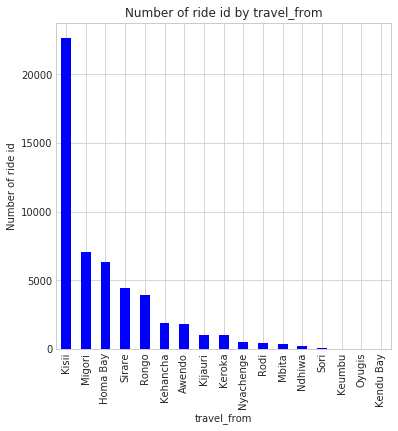

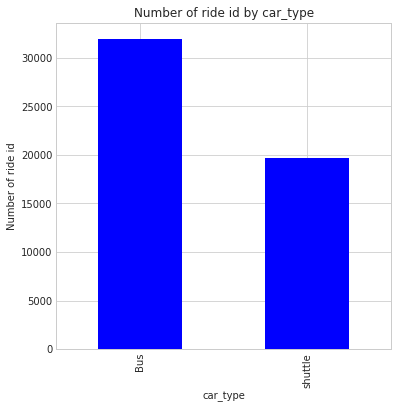

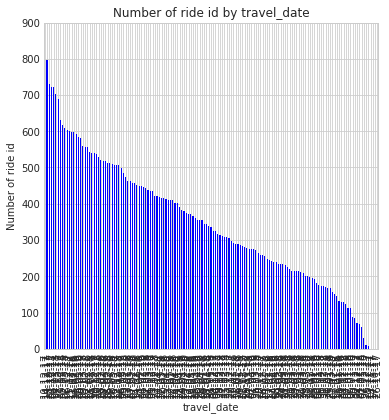

In [95]:
def plot_bars(train, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = train[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of ride id by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of ride id')# Set text for y axis
        plt.show()

plot_cols = ['travel_from', 'car_type', 'travel_date']
plot_bars(train, plot_cols)    

### 4. Categorical features

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
ride_id            51645 non-null int64
seat_number        51645 non-null object
payment_method     51645 non-null object
payment_receipt    51645 non-null object
travel_date        51645 non-null object
travel_time        51645 non-null object
travel_from        51645 non-null object
travel_to          51645 non-null object
car_type           51645 non-null object
max_capacity       51645 non-null int64
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [97]:
train.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
5,5777,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
6,5777,14A,Mpesa,MZHGDGS6QZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
7,5778,25,Mpesa,MYVTYFNXDZ,27-11-17,7:12,Migori,Nairobi,Bus,49
8,5778,21B,Mpesa,TE1WYK1NYE,27-11-17,7:12,Migori,Nairobi,Bus,49
9,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
ride_id            51645 non-null int64
seat_number        51645 non-null object
payment_method     51645 non-null object
payment_receipt    51645 non-null object
travel_date        51645 non-null object
travel_time        51645 non-null object
travel_from        51645 non-null object
travel_to          51645 non-null object
car_type           51645 non-null object
max_capacity       51645 non-null int64
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [99]:
num = pd.DataFrame({
    'ride_id':train['ride_id'],
    'number_of_tickets':1})

In [100]:
num = num.groupby('ride_id').sum()

In [101]:
num = num.merge(train, how='right', left_on='ride_id', right_on='ride_id', left_index=False, right_index=False)
num.head()

,ride_id,number_of_tickets,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,1,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,1,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,1,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,5,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5777,5,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49


In [102]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 11 columns):
ride_id              51645 non-null int64
number_of_tickets    51645 non-null int64
seat_number          51645 non-null object
payment_method       51645 non-null object
payment_receipt      51645 non-null object
travel_date          51645 non-null object
travel_time          51645 non-null object
travel_from          51645 non-null object
travel_to            51645 non-null object
car_type             51645 non-null object
max_capacity         51645 non-null int64
dtypes: int64(3), object(8)
memory usage: 4.7+ MB


In [103]:
num.head()

,ride_id,number_of_tickets,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,1,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,1,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,1,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,5,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5777,5,18B,Mpesa,B6PBDU30IZ,27-11-17,7:10,Homa Bay,Nairobi,Bus,49


In [104]:
num.drop_duplicates(subset='ride_id', keep='first', inplace=True)

In [105]:
num.head()

,ride_id,number_of_tickets,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,1,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,1,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,1,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,5,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
8,5778,31,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [106]:
num.shape

(6249, 11)

In [107]:
values = {
    'travel_from':{'Kisii':0, 'Migori':1, 'Homa Bay':2, 'Sirare':3, 'Rongo':4, 'Kehancha':5, 'Awendo':6,
       'Kijauri':7, 'Keroka':8, 'Nyachenge':9, 'Rodi':10, 'Mbita':11, 'Ndhiwa':12, 'Sori':13,
       'Keumbu':16, 'Oyugis':15, 'Kendu Bay':14},
    'travel_to':{'Nairobi':0},
    'car_type':{'Bus':0,'shuttle':1}
}
num.replace(values, inplace=True)

In [108]:
num['travel_date'] = pd.to_datetime(num['travel_date'])
num['travel_date'] = (num['travel_date'] - num['travel_date'].min()) / np.timedelta64(1, 'D')

H = num.travel_time.str.split(':')
i, j = H.str[0], H.str[1]
num['travel_time'] = i.astype(int) + (j.astype(float) / 60)


In [109]:
num['traffic'] = (num['travel_date'] * num['car_type'].mean()) / num['travel_time']
num['event'] = (num['travel_date'] / num['max_capacity'].mean())
num['convi'] = (num['travel_date'] * num['car_type'].mean()) / num['max_capacity']
num['free'] = num['traffic'] - num['event']
num.head()

,ride_id,number_of_tickets,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,traffic,event,convi,free
0,1442,1,15A,Mpesa,UZUEHCBUSO,278.0,7.250000,1,0,0,49,18.776632,9.147077,2.778175,9.629555
1,5437,1,14A,Mpesa,TIHLBUSGTE,311.0,7.200000,1,0,0,49,21.151384,10.232881,3.107958,10.918503
2,5710,1,8B,Mpesa,EQX8Q5G19O,318.0,7.083333,8,0,0,49,21.983677,10.463203,3.177913,11.520474
3,5777,5,19A,Mpesa,SGP18CL0ME,319.0,7.166667,2,0,0,49,21.796380,10.496106,3.187906,11.300274
8,5778,31,11A,Mpesa,BM97HFRGL9,319.0,7.200000,1,0,0,49,21.695471,10.496106,3.187906,11.199365


In [110]:
num.head()

,ride_id,number_of_tickets,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,traffic,event,convi,free
0,1442,1,15A,Mpesa,UZUEHCBUSO,278.0,7.250000,1,0,0,49,18.776632,9.147077,2.778175,9.629555
1,5437,1,14A,Mpesa,TIHLBUSGTE,311.0,7.200000,1,0,0,49,21.151384,10.232881,3.107958,10.918503
2,5710,1,8B,Mpesa,EQX8Q5G19O,318.0,7.083333,8,0,0,49,21.983677,10.463203,3.177913,11.520474
3,5777,5,19A,Mpesa,SGP18CL0ME,319.0,7.166667,2,0,0,49,21.796380,10.496106,3.187906,11.300274
8,5778,31,11A,Mpesa,BM97HFRGL9,319.0,7.200000,1,0,0,49,21.695471,10.496106,3.187906,11.199365


In [111]:
ft = num[['ride_id','travel_date','travel_time','travel_from','travel_to','car_type','max_capacity']]
lb = num[['number_of_tickets']]
# feature.to_csv('feature.csv', index=False)
# label.to_csv('label.csv', index=False)

In [112]:
# ft = pd.read_csv('feature.csv', index_col=False)
# lb = pd.read_csv('label.csv', index_col=False)
ft.shape, lb.shape

((6249, 7), (6249, 1))

In [113]:
ft.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,278.0,7.250000,1,0,0,49
1,5437,311.0,7.200000,1,0,0,49
2,5710,318.0,7.083333,8,0,0,49
3,5777,319.0,7.166667,2,0,0,49
8,5778,319.0,7.200000,1,0,0,49


In [114]:
# from sklearn.preprocessing import scale
# num_cols = ['travel_time', 'travel_from', 'car_type', 'max_capacity']
# ft = scale(ft)
# ftt = pd.DataFrame(ft, columns = num_cols)
# print(ftt.describe().round(3))

In [115]:
num.drop('travel_to', axis=1).corr().head(8).sort_values(['ride_id'], ascending=[2])

,ride_id,number_of_tickets,travel_date,travel_time,travel_from,car_type,max_capacity,traffic,event,convi,free
car_type,-0.257885,-0.208762,-0.141949,-0.019499,-0.371997,1.000000,-1.000000,-0.128809,-0.141949,0.836602,-0.097947
traffic,-0.003019,-0.113644,0.792013,-0.525290,0.139269,-0.128809,0.128809,1.000000,0.792013,0.266080,0.937332
travel_date,0.024083,0.018615,1.000000,0.016033,0.091067,-0.141949,0.141949,0.792013,1.000000,0.351670,0.529656
number_of_tickets,0.093817,1.000000,0.018615,0.205832,-0.195759,-0.208762,0.208762,-0.113644,0.018615,-0.187291,-0.168517
travel_time,0.103864,0.205832,0.016033,1.000000,-0.056128,-0.019499,0.019499,-0.525290,0.016033,-0.024617,-0.738969
max_capacity,0.257885,0.208762,0.141949,0.019499,0.371997,-1.000000,1.000000,0.128809,0.141949,-0.836602,0.097947
travel_from,0.281862,-0.195759,0.091067,-0.056128,1.000000,-0.371997,0.371997,0.139269,0.091067,-0.321248,0.141520
ride_id,1.000000,0.093817,0.024083,0.103864,0.281862,-0.257885,0.257885,-0.003019,0.024083,-0.312437,-0.017940


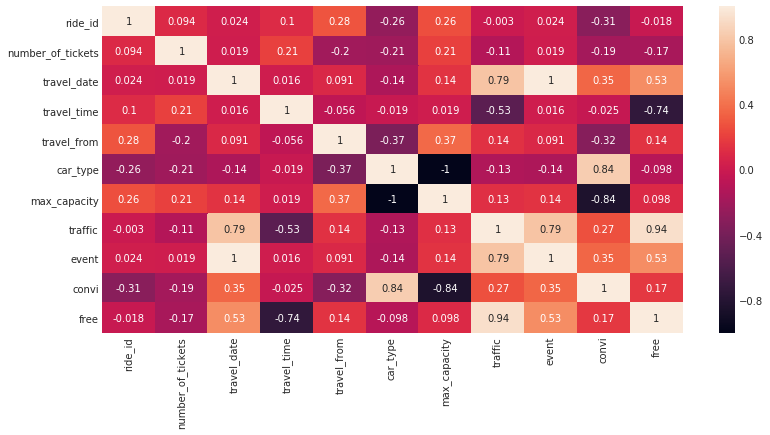

In [116]:
plt.figure(figsize=(13,6))
sns.heatmap(num.drop('travel_to', axis=1).corr(), annot=True)

In [117]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 51644
Data columns (total 15 columns):
ride_id              6249 non-null int64
number_of_tickets    6249 non-null int64
seat_number          6249 non-null object
payment_method       6249 non-null object
payment_receipt      6249 non-null object
travel_date          6249 non-null float64
travel_time          6249 non-null float64
travel_from          6249 non-null int64
travel_to            6249 non-null int64
car_type             6249 non-null int64
max_capacity         6249 non-null int64
traffic              6249 non-null float64
event                6249 non-null float64
convi                6249 non-null float64
free                 6249 non-null float64
dtypes: float64(6), int64(6), object(3)
memory usage: 781.1+ KB


In [118]:
test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 7 columns):
ride_id         1111 non-null int64
travel_date     1111 non-null object
travel_time     1111 non-null object
travel_from     1111 non-null object
travel_to       1111 non-null object
car_type        1111 non-null object
max_capacity    1111 non-null int64
dtypes: int64(2), object(5)
memory usage: 60.8+ KB


In [120]:
values = {
    'travel_from':{'Kisii':0, 'Migori':1, 'Homa Bay':2, 'Sirare':3, 'Rongo':4, 'Kehancha':5, 'Awendo':6,
       'Kijauri':7, 'Keroka':8, 'Nyachenge':9, 'Rodi':10, 'Mbita':11, 'Ndhiwa':12, 'Sori':13,
       'Keumbu':16, 'Oyugis':15, 'Kendu Bay':14},
    'travel_to':{'Nairobi':0},
    'car_type':{'Bus':0,'shuttle':1}
}
test.replace(values, inplace=True)

In [121]:
test['travel_date'] = pd.to_datetime(test['travel_date'])
test['travel_date'] = (test['travel_date'] - test['travel_date'].min()) / np.timedelta64(1, 'D')

h = test.travel_time.str.split(':')
i, j = h.str[0], h.str[1]
test['travel_time'] = i.astype(int) + (j.astype(float) / 60)



In [122]:
test['traffic'] = (test['travel_date'] * test['car_type'].mean()) / test['travel_time']
test['event'] = (test['travel_date'] / test['max_capacity'].mean())
test['convi'] = (test['travel_date'] * test['car_type'].mean()) / test['max_capacity']
test['free'] = test['traffic'] - test['event']
test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,traffic,event,convi,free
0,247,16.0,7.100000,0,0,0,49,1.038526,0.508133,0.150480,0.530394
1,256,15.0,11.133333,0,0,1,11,0.620900,0.476374,0.628426,0.144526
2,275,13.0,5.000000,0,0,1,11,1.198200,0.412858,0.544636,0.785342
3,285,13.0,9.166667,0,0,1,11,0.653564,0.412858,0.544636,0.240706
4,286,13.0,9.333333,0,0,1,11,0.641893,0.412858,0.544636,0.229035


In [123]:
test = test[['max_capacity','travel_date','travel_time','traffic','event','convi','free']]

In [124]:
test.head()

,max_capacity,travel_date,travel_time,traffic,event,convi,free
0,49,16.0,7.100000,1.038526,0.508133,0.150480,0.530394
1,11,15.0,11.133333,0.620900,0.476374,0.628426,0.144526
2,11,13.0,5.000000,1.198200,0.412858,0.544636,0.785342
3,11,13.0,9.166667,0.653564,0.412858,0.544636,0.240706
4,11,13.0,9.333333,0.641893,0.412858,0.544636,0.229035


In [125]:
X = num[['max_capacity','travel_date','travel_time','traffic','event','convi','free']]
y = num['number_of_tickets']

### 5. Model

In [126]:
from sklearn.cross_validation import train_test_split

In [127]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1777, random_state=101)

In [128]:
len(X_test)

1111

In [136]:
## Scale the feature, being sure to use the scale of the training
## data not the test data. 
scaler = preprocessing.StandardScaler().fit(np.array(X_train.reshape(-1,1)))
X_train = scaler.transform(np.array(X_train.reshape(-1,1)))     
y_train = scaler.transform(np.array(y_train).resha)     

ValueError: Expected 2D array, got 1D array instead:
array=[ 1. 31. 11. ... 16.  4.  2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 5.1  Gradient Boosting Machine

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

/home/clone/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

In [63]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [64]:
gbr_pred1 = gbr.predict(X_test)
gbr_pred1

array([ 5.70915092,  7.98706233, 14.94896288, ..., 12.307402  ,
       18.22766128,  5.85739563])

In [65]:
gbr_pred2 = gbr.predict(test)
gbr_pred2

array([5.20489248, 7.14617852, 4.39424288, ..., 7.44673137, 5.31643389,
       6.70147773])

In [66]:
gbr.score(X,y)

0.3259800830692695

In [67]:
predict_1 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':gbr_pred1
})

In [68]:
predict_1.head()

,ride_id,number_of_ticket
0,247,5.709151
1,256,7.987062
2,275,14.948963
3,285,7.987062
4,286,9.296813


In [69]:
predict_2 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':gbr_pred2
})

In [70]:
predict_2.head()

,ride_id,number_of_ticket
0,247,5.204892
1,256,7.146179
2,275,4.394243
3,285,7.336852
4,286,7.336852


In [71]:
# predict_1.to_csv('gbr1_tra_1.csv', index=False)
predict_2.to_csv('1.csv', index=False)

###  5.2 SVR

In [66]:
from sklearn.svm import SVR

In [67]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
las_pred1 = svr.predict(X_test)
las_pred1

array([4.44644603, 9.80514733, 4.0521393 , ..., 5.12198938, 5.38656804,
       5.72818916])

In [69]:
las_pred2 = svr.predict(test)
las_pred2

array([5.39371659, 5.39371659, 5.39371659, ..., 5.39371659, 5.39371659,
       5.39371659])

In [70]:
predict_3 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':las_pred1
})

In [71]:
predict_4 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':las_pred2
})

In [72]:
predict_3.to_csv('svr3_tra_3.csv', index=False)
predict_4.to_csv('svr4_tra_4.csv', index=False)

###  5.3 KNN

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [74]:
knr = KNeighborsRegressor()

In [75]:
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [76]:
rfg_pred1 = knr.predict(X_test)
rfg_pred1

array([ 2.2, 10.4,  9. , ...,  7.8,  7.8,  9.6])

In [77]:
rfg_pred2 = knr.predict(test)
rfg_pred2

array([5.2, 8.4, 6.8, ..., 4.6, 4.6, 3.8])

In [78]:
predict_5 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':rfg_pred1
})
predict_6 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':rfg_pred2
})

In [79]:
predict_5.to_csv('knr5_tra_5.csv', index=False)
predict_6.to_csv('knr6_tra_6.csv', index=False)

### 5.4 Random Forest 

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
rfr_pred1 = rfr.predict(X_test)
rfr_pred2 = rfr.predict(test)

In [83]:
predict_7 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':rfr_pred1
})
predict_8 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':rfr_pred2
})

In [84]:
predict_7.to_csv('rfr1.csv', index=False)
predict_8.to_csv('rfr2_tra_6.csv', index=False)

###  5.5 Adaboost

In [85]:
from sklearn.ensemble import AdaBoostRegressor

In [86]:
ada = AdaBoostRegressor()

In [87]:
ada.fit(X_train, y_train)
ada_pred1 = ada.predict(X_test)
ada_pred2 = ada.predict(test)

In [88]:
predict_9 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':ada_pred1
})
predict_10 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':ada_pred2
})

In [89]:
predict_9.to_csv('ada1.csv', index=False)
predict_10.to_csv('ada2.csv', index=False)

### 

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred1 = ada.predict(X_test)
gbr_pred2 = ada.predict(test)

predict_11 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':gbr_pred1
})
predict_12 = pd.DataFrame({
    'ride_id':t_id,
    'number_of_ticket':gbr_pred2
})

predict_11.to_csv('gbr1.csv', index=False)
predict_12.to_csv('gbr2.csv', index=False)